## 0 环境准备

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
test_img_path = "/NUS_datasets/Hand_dataset/fist/fist_000.JPG"
origin_data_path = "/NUS_datasets/Hand_dataset"

In [3]:
def cv2plt(img):
    plt.figure()        # To change the size of figure
    plt.axis('off')
    if np.size(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img,cmap='gray',vmin=0,vmax=255)  
    plt.show()

print(cv2plt)

<function cv2plt at 0x0000014E2FD79280>


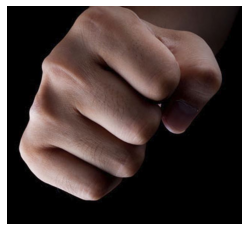

In [4]:
img = cv2.imread(test_img_path)
cv2plt(img)

## 1 手部图片二值化转存 [肤色识别]

In [5]:
def cr_otsu(image):
    """YCrCb颜色空间的Cr分量+Otsu阈值分割
    :param image: 图片路径
    :return: None
    """
    img = cv2.imread(image, cv2.IMREAD_COLOR)
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
 
    (y, cr, cb) = cv2.split(ycrcb)
    cr1 = cv2.GaussianBlur(cr, (5, 5), 0)
    _, skin = cv2.threshold(cr1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return skin

# display
#     cv2.namedWindow("image raw", cv2.WINDOW_NORMAL)
#     cv2.imshow("image raw", img)
#     cv2.namedWindow("image CR", cv2.WINDOW_NORMAL)
#     cv2.imshow("image CR", cr1)
#     cv2.namedWindow("Skin Cr+OTSU", cv2.WINDOW_NORMAL)
#     cv2.imshow("Skin Cr+OTSU", skin)
 
#     dst = cv2.bitwise_and(img, img, mask=skin)
#     cv2.namedWindow("seperate", cv2.WINDOW_NORMAL)
#     cv2.imshow("seperate", dst)

In [6]:
binary_test = (cv2.resize(cr_otsu(test_img_path),(224,224)))

In [16]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=b62a7fa029858b299d13c64ede726cc164ab0661006ae00385ba5a1000bb29cf
  Stored in directory: c:\users\wang\appdata\local\pip\cache\wheels\f5\0c\3a\61b992f7aa85de40f339e6d4970d91dddb103dd0ad6c5d58f2
Successfully built imutils


You should consider upgrading via the 'd:\programdata\anaconda3\envs\nus_workshop\python.exe -m pip install --upgrade pip' command.


In [7]:
Binary_img_path = "/NUS_datasets/Hand_dataset_binary/"

In [8]:
# 用以代替循环的方式
from imutils import paths 
'''
Use ‘paths’ from ‘imutil’ library, it can easily get all the images 
in this folder (including subfolder) without the need to specifying file extension
'''
imgPaths        = list(paths.list_images(origin_data_path)) 
'''
	imgPaths | list   | 2307    | ['data/volleyball/00000428.jpg','data ...
'''
loop = 0
for pth in imgPaths: 
  	# os.path.sep 以路径分隔符分割的list, 跨平台通用
    # ['/NUS_datasets/Hand_dataset', 'fist', 'fist_000.JPG']
    l           = pth.split(os.path.sep)[-2] 
    name        = pth.split(os.path.sep)[-1] 
    
    img         = cr_otsu(pth)
    img         = cv2.resize(img, (224, 224))
    
    
    if not os.path.exists(Binary_img_path+l):
        os.makedirs(Binary_img_path+l)
    cv2.imwrite(Binary_img_path+l+'/'+name,img)    
    print("loop: %d over",loop)
    loop = loop +1
    

loop: %d over 0
loop: %d over 1
loop: %d over 2
loop: %d over 3
loop: %d over 4
loop: %d over 5
loop: %d over 6
loop: %d over 7
loop: %d over 8
loop: %d over 9
loop: %d over 10
loop: %d over 11
loop: %d over 12
loop: %d over 13
loop: %d over 14
loop: %d over 15
loop: %d over 16
loop: %d over 17
loop: %d over 18
loop: %d over 19
loop: %d over 20
loop: %d over 21
loop: %d over 22
loop: %d over 23
loop: %d over 24
loop: %d over 25
loop: %d over 26
loop: %d over 27
loop: %d over 28
loop: %d over 29
loop: %d over 30
loop: %d over 31
loop: %d over 32
loop: %d over 33
loop: %d over 34
loop: %d over 35
loop: %d over 36
loop: %d over 37
loop: %d over 38
loop: %d over 39
loop: %d over 40
loop: %d over 41
loop: %d over 42
loop: %d over 43
loop: %d over 44
loop: %d over 45
loop: %d over 46
loop: %d over 47
loop: %d over 48
loop: %d over 49
loop: %d over 50
loop: %d over 51
loop: %d over 52
loop: %d over 53
loop: %d over 54
loop: %d over 55
loop: %d over 56
loop: %d over 57
loop: %d over 58
loop: %

## 2 提取HOG特征

In [9]:
#在这里设置参数
winSize = (224,224)
blockSize = (32,32)
blockStride = (16,16)
cellSize = (16,16)

nbins = 9

#定义对象hog，同时输入定义的参数，剩下的默认即可
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins)

In [10]:
# 用以代替循环的方式
from imutils import paths 

imgPaths        = list(paths.list_images(Binary_img_path)) 

loop = 0
dat = []
lbl = []
for pth in imgPaths: 
  	# os.path.sep 以路径分隔符分割的list, 跨平台通用
    # ['/NUS_datasets/Hand_dataset', 'fist', 'fist_000.JPG']
    l           = pth.split(os.path.sep)[-2]  
    l           = l.split("/")[-1]
    img         = cv2.imread(pth)
    HOG_feature    = hog.compute(img).reshape((-1,))
    
    dat.append(HOG_feature) 
    lbl.append(l) 

dat = np.array(dat)
lbl = np.array(lbl)
print(dat.shape)
print(lbl.shape)

(548, 6084)
(548,)


In [11]:
lbl

array(['fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist',
       'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist',
       'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist',
       'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist',
       'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist',
       'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist',
       'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist',
       'fist', 'fist', 'fist', 'fist', 'five', 'five', 'five', 'five',
       'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five',
       'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five',
       'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five',
       'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five',
       'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five',
       'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five',
      

## 3 SVM 分类 

In [12]:
from sklearn.preprocessing import LabelEncoder
le      = LabelEncoder()
lbls    = le.fit_transform(lbl)
classes = list(le.classes_)  
classes = [str(c) for c in classes]

print(classes)
print(lbls.shape)
lbls

['fist', 'five', 'gundown', 'gunup', 'one', 'test_data', 'thumbdown', 'thumbleft', 'thumbright', 'thumbup']
(548,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5,

#### 测试代码 并不是pipline中的一步

In [13]:
inverted = le.inverse_transform(lbls)
#inverted = le.inverse_transform([argmax(lbls)])
inverted

array(['fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist',
       'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist',
       'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist',
       'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist',
       'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist',
       'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist', 'fist',
       'fist', 'fist', 'fist', 'fist', 'five', 'five', 'five', 'five',
       'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five',
       'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five',
       'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five',
       'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five',
       'five', 'five', 'five', 'five', 'five', 'five', 'five', 'five',
       'five', 'gundown', 'gundown', 'gundown', 'gundown', 'gundown',
       'gundown', 'gundown', 'gundown', 'gundown', 'gundown', 'gundown',
     

In [21]:
from sklearn.preprocessing import OneHotEncoder

lbls_pre = lbls.reshape(lbls.shape[0],1)
ohe = OneHotEncoder()
onehot = ohe.fit_transform(lbls_pre).toarray()
onehot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [30]:
inverted = le.inverse_transform([np.argmax(onehot[100,:])])
inverted

array(['gundown'], dtype='<U10')

#### -------------------------------------------

In [51]:
from sklearn.model_selection import train_test_split
'''
	allRecords.shape(21312,8000,1)
	lbls.shape(21312,10)	
'''
(trDat,
 vlDat,
 trLbl, 
 vlLbl) = train_test_split(dat,
               lbls,
               # Make sure the split is applied on each class
               stratify=lbls, 
               test_size=0.15,
               random_state=229,
               shuffle=True)
 
print("The shape of trDat is", trDat.shape)
print("The shape of vlDat is", vlDat.shape)

The shape of trDat is (465, 6084)
The shape of vlDat is (83, 6084)


([<matplotlib.axis.XTick at 0x14e34aa6280>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

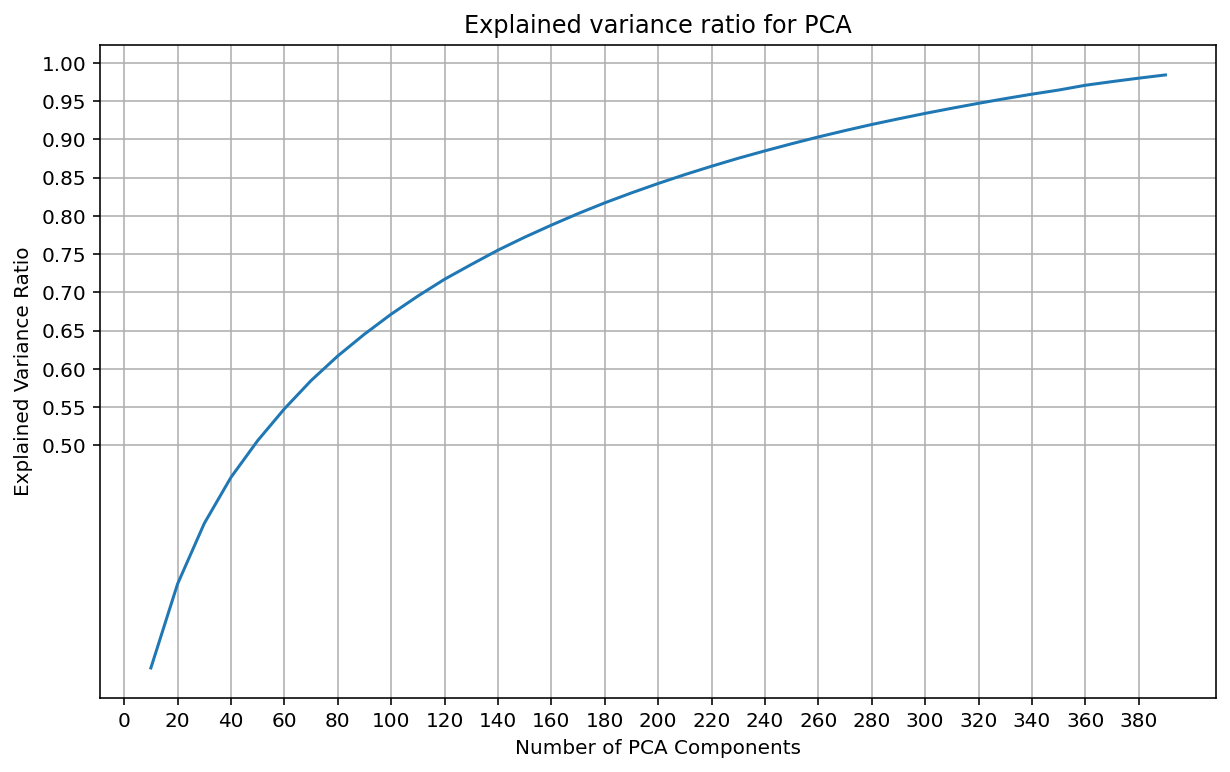

In [42]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
candidate_components = range(10,400,10)
explained_ratios =[]

for c in candidate_components:
    pca = PCA(n_components=c)
    X_pca = pca.fit_transform(trDat)
    explained_ratios.append(np.sum(pca.explained_variance_ratio_))
    
plt.figure(figsize=(10,6), dpi=144)
plt.grid()
plt.plot(candidate_components, explained_ratios)
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained variance ratio for PCA')
plt.yticks(np.arange(0.5,1.05,.05))
plt.xticks(np.arange(0,400,20))

In [43]:
pca = PCA(n_components=320)
X_pca = pca.fit_transform(trDat)
X_pca.shape

(438, 320)

In [47]:
import joblib
joblib.dump(pca, 'pca.m') # 将模型保存到pca.m文件中

['pca.m']

In [52]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

svm_model = svm.SVC(kernel = 'linear', C = 5,decision_function_shape='ovo').fit(trDat,trLbl)

y_pred = svm_model.predict(vlDat)
# validation = pca.transform(vlDat)
# y_pred = svm_model.predict(validation)

print(confusion_matrix(vlLbl, y_pred))

print("train score:",svm_model.score(trDat,trLbl))
print("test score:",svm_model.score(vlDat,vlLbl))

[[4 1 1 0 1 0 0 0 0 2]
 [0 6 0 2 1 0 0 0 0 0]
 [0 0 9 0 0 0 0 0 0 0]
 [0 1 0 6 2 0 0 0 0 0]
 [1 0 0 1 5 0 1 0 0 1]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 2 0 0 0 6 1 0 0]
 [2 0 1 0 1 0 1 4 0 0]
 [0 0 0 0 0 0 0 0 8 1]
 [0 0 1 1 0 0 0 0 0 7]]
train score: 1.0
test score: 0.6867469879518072


In [26]:
# shuffle
index = np.arange(lbls.shape[0])
np.random.shuffle(index)
lbls = lbls[index]
dat = dat[index]

print("shuffle all data ")

shuffle all data 


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm

parameters={'C':np.linspace(0.1,20,50),'gamma':np.linspace(0.1,20,20)}
svc = svm.SVC(kernel='linear',decision_function_shape='ovo')
model = GridSearchCV(svc,parameters,cv=5,scoring='accuracy',verbose=3)
model.fit(dat,lbls)
print(model.best_params_,model.best_score_)

# model.score(vlDat,vlLbl)
# y_pred = model.predict(vlDat)
# print(model.score(dat,lbls))
# print(classification_report(vlLbl, y_pred))

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.765 total time=   0.4s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.774 total time=   0.4s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.679 total time=   0.5s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.798 total time=   0.5s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.714 total time=   0.5s
[CV 1/5] END ...C=0.1, gamma=1.1473684210526316;, score=0.765 total time=   0.5s
[CV 2/5] END ...C=0.1, gamma=1.1473684210526316;, score=0.774 total time=   0.5s
[CV 3/5] END ...C=0.1, gamma=1.1473684210526316;, score=0.679 total time=   0.5s
[CV 4/5] END ...C=0.1, gamma=1.1473684210526316;, score=0.798 total time=   0.5s
[CV 5/5] END ...C=0.1, gamma=1.1473684210526316;, score=0.714 total time=   0.4s
[CV 1/5] END ....C=0.1, gamma=2.194736842105263;, score=0.765 total time=   0.5s
[CV 2/5] END ....C=0.1, gamma=2.194736842105

In [20]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

svm_model = svm.SVC(kernel = 'linear', C = 2,decision_function_shape='ovr').fit(trDat,trLbl)

y_pred = svm_model.predict(vlDat)

print(confusion_matrix(vlLbl, y_pred))

print("train score:",svm_model.score(trDat,trLbl))
print("test score:",svm_model.score(vlDat,vlLbl))

[[5 0 0 0 1 0 1 0 1]
 [0 6 0 1 0 0 0 0 0]
 [0 0 7 0 0 1 0 0 0]
 [0 0 0 6 2 0 0 0 0]
 [0 0 0 0 6 0 0 0 2]
 [0 0 1 0 0 5 0 0 0]
 [2 0 0 0 0 0 5 0 0]
 [0 0 0 1 0 0 0 5 0]
 [0 0 0 0 2 0 0 0 4]]
train score: 1.0
test score: 0.765625


In [27]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report
loo = LeaveOneOut()
count = 0
i = 0
yred = [] 
ytrue = []
for train,test in loo.split(dat):
    print("loop: ", i)
    i=i+1
    svm_model = svm.SVC(kernel = 'linear', C = 2,decision_function_shape='ovo').fit(dat[train],lbls[train])
    y_pred = svm_model.predict(dat[test])
    yred.append(y_pred)
    ytrue.append(lbls[test])
    
    print("y_pred: ",y_pred)
    if y_pred == lbls[test]:
        count = count + 1
print(classification_report(ytrue , yred))
print(count/dat.shape[0])


loop:  0
y_pred:  [0]
loop:  1
y_pred:  [2]
loop:  2
y_pred:  [4]
loop:  3
y_pred:  [0]
loop:  4
y_pred:  [5]
loop:  5
y_pred:  [2]
loop:  6
y_pred:  [7]
loop:  7
y_pred:  [7]
loop:  8
y_pred:  [0]
loop:  9
y_pred:  [3]
loop:  10
y_pred:  [4]
loop:  11
y_pred:  [6]
loop:  12
y_pred:  [4]
loop:  13
y_pred:  [8]
loop:  14
y_pred:  [1]
loop:  15
y_pred:  [7]
loop:  16
y_pred:  [7]
loop:  17
y_pred:  [3]
loop:  18
y_pred:  [0]
loop:  19
y_pred:  [8]
loop:  20
y_pred:  [8]
loop:  21
y_pred:  [6]
loop:  22
y_pred:  [5]
loop:  23
y_pred:  [7]
loop:  24
y_pred:  [5]
loop:  25
y_pred:  [1]
loop:  26
y_pred:  [4]
loop:  27
y_pred:  [2]
loop:  28
y_pred:  [2]
loop:  29
y_pred:  [3]
loop:  30
y_pred:  [5]
loop:  31
y_pred:  [7]
loop:  32
y_pred:  [4]
loop:  33
y_pred:  [3]
loop:  34
y_pred:  [4]
loop:  35
y_pred:  [4]
loop:  36
y_pred:  [2]
loop:  37
y_pred:  [3]
loop:  38
y_pred:  [8]
loop:  39
y_pred:  [6]
loop:  40
y_pred:  [6]
loop:  41
y_pred:  [5]
loop:  42
y_pred:  [8]
loop:  43
y_pred:  [2

In [29]:
print(confusion_matrix(ytrue , yred))

[[40  0  1  0  5  0  4  1  1]
 [ 2 36  0  3  2  0  1  1  0]
 [ 1  0 50  0  1  2  0  0  0]
 [ 0  4  0 37  8  0  0  1  0]
 [ 2  2  2  5 27  1  1  2  5]
 [ 2  0  4  0  0 31  3  2  1]
 [ 6  0  2  0  0  3 33  0  1]
 [ 0  0  1  2  2  1  0 33  3]
 [ 1  0  1  2  8  0  0  1 27]]
